### Подключение инфраструктуры

In [1]:
# Подключение к Google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
PATH = '/content/drive/My Drive/GU_NN/'

In [0]:
import sys
import os
sys.path.append(PATH)

In [4]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


### Задание

Обучить детектор объектов с помощью TensorFlow Object Detection API
Библиотеки: [Python, Tensorflow]

### Библиотеки

In [0]:
import warnings
warnings.filterwarnings("ignore", category=Warning) 

Загрузка и подготовка библиотеки keras-retinanet

In [6]:
if 1:
    !git -C '/content/drive/My Drive/GU_NN/' clone https://github.com/fizyr/keras-retinanet.git
    !cd '/content/drive/My Drive/GU_NN/keras-retinanet/' \
        && git reset --hard abe89380835bc06dff3b97e69fa2b19dd7fd97a8 \
        && pip install . \
        && python '/content/drive/My Drive/GU_NN/keras-retinanet/setup.py' build_ext --inplace

fatal: destination path 'keras-retinanet' already exists and is not an empty directory.
HEAD is now at abe8938 Merge pull request #1326 from fizyr/import_imagenet_weights_effnet
Processing /content/drive/My Drive/GU_NN/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=168964 sha256=9adbee24c0d004d0a232cef9e6a1bc6a7ea9dcba62ed79292ab4a14e733a688c
  Stored in directory: /root/.cache/pip/wheels/2d/ec/50/fb21cb29be797e6ed06177ec0896ca1b8fb3e4dea439f756fc
Successfully built keras-retinanet
  Found existing installation: keras-retinanet 0.5.1
    Uninstalling keras-retinanet-0.5.1:
      Successfully uninstalled keras-retinanet-0.5.1
running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils/compute_overlap.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release

### Загрузка предобученной модели

In [0]:
if 0:
  !wget "https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5" -o '/content/drive/My Drive/GU_NN/resnet50_coco_best_v2.1.0.h5'

### Обучение модели для детектирования объектов

In [8]:
!python '/content/drive/My Drive/GU_NN/keras-retinanet/keras_retinanet/bin/train.py' \
    --random-transform \
    --weights "./resnet50_coco_best_v2.1.0.h5" \
    --steps 100 \
    --epochs 20 \
    --snapshot-path '/content/drive/My Drive/GU_NN/keras-retinanet/snapshots/' \
    csv '/content/drive/My Drive/GU_NN/data/annotations.csv' '/content/drive/My Drive/GU_NN/data/classes.csv'

Using TensorFlow backend.
Creating model, this may take a second...
Instructions for updating:
If using Keras pass *_constraint arguments to layers.

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1319: UserWarning: Skipping loading of weights for layer classification_submodel due to mismatch in shape ((3, 3, 256, 18) vs (720, 256, 3, 3)).
  weight_values[i].shape))
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1319: UserWarning: Skipping loading of weights for layer classification_submodel due to mismatch in shape ((18,) vs (720,)).
  weight_values[i].shape))
2020-06-11 10:35:18.780818: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-06-11 10:35:18.805912: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-06-11 10:35:18.806493: I tensorflow/

### Конвертация обученной модели для инференса

In [9]:
!python '/content/drive/My Drive/GU_NN/keras-retinanet/keras_retinanet/bin/convert_model.py' \
    '/content/drive/My Drive/GU_NN/keras-retinanet/snapshots/resnet50_csv_20.h5' \
    '/content/drive/My Drive/GU_NN/keras-retinanet/snapshots/inference_model.h5'

Using TensorFlow backend.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.

2020-06-11 10:53:00.836331: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-06-11 10:53:00.848946: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2020-06-11 10:53:00.849012: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: d11763c1ad4e
2020-06-11 10:53:00.849044: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: d11763c1ad4e
2020-06-11 10:53:00.849121: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 418.67.0
2020-06-11 10:53:00.849158: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 418.67.0
2020-06-11 10:53:00.849171: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc

### Загрузка необходимых библиотек

In [0]:
import time
import imageio
from matplotlib import pyplot as plt
import matplotlib.patches as patches

from keras_retinanet.models import load_model
from keras_retinanet.utils.image import preprocess_image, resize_image
from keras_retinanet.utils.colors import label_color

### Загрузка модели для инференса

In [11]:
model = load_model(os.path.join(PATH, 'keras-retinanet/snapshots/inference_model.h5'), backbone_name='resnet50')

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_1:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_2:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_3:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_4:0' shape=(9, 4) dtype=float32> anchors

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Загрузка словаря с метками классов

In [12]:
labels_to_names = {}
with open(os.path.join(PATH, 'data/classes.csv')) as f:
    for line in f:
        cls_name, cls_id = line.split(',')
        labels_to_names[int(cls_id.strip())] = cls_name.strip()
print(labels_to_names)

{0: 'mouse1', 1: 'mouse2'}


### Функция применения модели для детектирования объектов

In [0]:
def detect_objects(image):    
    image_processed = preprocess_image(image[:,:,::-1].copy())
    image_processed, scale = resize_image(image_processed)

    start = time.time()
    boxes, scores, labels = model.predict(image_processed[None, ...])
    print("Processing time: ", time.time() - start)
    boxes /= scale
    return boxes[0], scores[0], labels[0]

### Функция визуализации результатов детектирования объектов

In [0]:
def draw_predictions(image, predictions=None):
    draw = image.copy()
    fig, ax = plt.subplots(1, figsize=(12, 12))
    ax.imshow(draw)

    if predictions is None:
        return
        
    boxes, scores, labels = predictions
    SCORE_THRESHOLD = 0.5
    for box, score, label in zip(boxes, scores, labels):
        if score < SCORE_THRESHOLD:
            break

        box_y = int(box[1])
        box_x = int(box[0])
        box_h = int(box[3]-box[1])
        box_w = int(box[2]-box[0])
        caption = "{} {:.3f}".format(labels_to_names[label], score)
        if 0:
            color = [x/255 for x in label_color(label)]
        else:
            color =  [(0, 1, 0), (1, 1, 0), (1, 0, 1), (1, 0, 0)][label]

        label_size = 20
        plt_scale = float(fig.get_size_inches()[1]) * fig.dpi * draw.shape[0] * label_size / 12545280
        ax.add_patch(patches.Rectangle((box_x, box_y), 
                                 box_w, box_h, 
                                 linewidth=2, edgecolor=color, facecolor='none'))
        ax.add_patch(patches.Rectangle((box_x, box_y-round(26*plt_scale)), 
                                 round(plt_scale*len(caption)*14), round(26*plt_scale), 
                                 linewidth=2, edgecolor=color, facecolor=color))
        ax.text(box_x + round(3*plt_scale), box_y - round(5*plt_scale), caption, fontsize=label_size)

### Детектирование объектов на тестовом изображении


Processing time:  3.0013062953948975


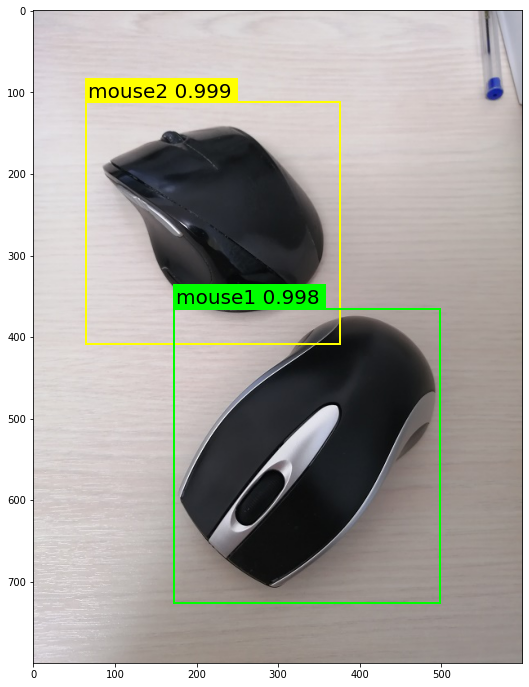

In [15]:
image = imageio.imread(os.path.join(PATH, 'data//test.jpg'))
predictions = detect_objects(image)
draw_predictions(image, predictions)